In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# sklearn
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

# visualization
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("data.csv")
dataset = dataset.iloc[0:20000,:]
dataset

valence  year  acousticness  \
0       0.0594  1921        0.9820   
1       0.9630  1921        0.7320   
2       0.0394  1921        0.9610   
3       0.1650  1921        0.9670   
4       0.2530  1921        0.9570   
...        ...   ...           ...   
19995   0.2170  1926        0.4400   
19996   0.4530  1926        0.0513   
19997   0.2950  1926        0.5010   
19998   0.3220  1926        0.4200   
19999   0.5610  1926        0.0350   

                                                 artists  danceability  \
0      ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                         ['Dennis Day']         0.819   
2      ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                       ['Frank Parker']         0.275   
4                                         ['Phil Regan']         0.418   
...                                                  ...           ...   
19995                ['Georgette Heyer', 'Irina Salkow']         0.718   
19996                               ['Эрнест Хемингуэй']         0.675   
19997                ['Georgette Heyer', 'Irina Salkow']         0.743   
19998                ['Georgette Heyer', 'Irina Salkow']         0.709   
19999                                  ['Future Rapper']         0.868   

       duration_ms  energy  explicit                      id  \
0           831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz   
1           180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8   
2           500062   0.166         0  1o6I8BglA6ylDMrIELygv1   
3           210000   0.309         0  3ftBPsC5vPBKxYSee08FDH   
4           166693   0.193         0  4d6HGyGT8e121BsdKmw9v6   
...            ...     ...       ...                     ...   
19995       120621   0.141         0  0qUOwTSUpvUgWzFk0snSZP   
19996        96700   0.249         1  0qbnT6ZvsjXQLfwXmUnu9x   
19997       118088   0.166         0  0qiytPoGHx5mcIvhrpgdJA   
19998       128197   0.122         0  0qkeqVfqPZTgwLNVGSTh97   
19999       145863   0.626         0  0r5xvEZEjDarFkomOBHjdT   

       instrumentalness  key  liveness  loudness  mode  \
0              0.878000   10     0.665   -20.096     1   
1              0.000000    7     0.160   -12.441     1   
2              0.913000    3     0.101   -14.850     1   
3              0.000028    5     0.381    -9.316     1   
4              0.000002    3     0.229   -10.096     1   
...                 ...  ...       ...       ...   ...   
19995          0.000003   11     0.112   -21.975     1   
19996          0.000000    1     0.541   -16.773     1   
19997          0.000000   10     0.167   -21.960     1   
19998          0.000000    9     0.312   -21.972     0   
19999          0.050200    1     0.715   -13.414     1   

                                                    name  popularity  \
0      Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4   
1                                Clancy Lowered the Boom           5   
2                                              Gati Bali           5   
3                                              Danny Boy           3   
4                            When Irish Eyes Are Smiling           2   
...                                                  ...         ...   
19995            Kapitel 353 - Der Page und die Herzogin           1   
19996                                Часть 72.3 - Фиеста           0   
19997            Kapitel 201 - Der Page und die Herzogin           1   
19998            Kapitel 195 - Der Page und die Herzogin           1   
19999                                     Sati Rawn Tana           0   

      release_date  speechiness    tempo  
0             1921       0.0366   80.954  
1             1921       0.4150   60.936  
2             1921       0.0339  110.339  
3             1921       0.0354  100.109  
4             1921       0.0380  101.665  
...            ...          ...      ...  
19995         1926       0.94

In [3]:
dataset.isna().sum()

valence             0
year                0
acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
dtype: int64

In [4]:
dataset.isnull().any()

valence             False
year                False
acousticness        False
artists             False
danceability        False
duration_ms         False
energy              False
explicit            False
id                  False
instrumentalness    False
key                 False
liveness            False
loudness            False
mode                False
name                False
popularity          False
release_date        False
speechiness         False
tempo               False
dtype: bool

In [5]:
# delete unique values
index_size = dataset.values.shape[0]
reduced_dataset=dataset
for c,column in enumerate(dataset.columns):
    # fill empty string to non and delete 
    dataset[column].replace('', np.nan, inplace=True)
    dataset.dropna(subset=[column], inplace=True)
    # eğer unique sayiyi size a eşitse bu column u sil.
    if dataset[column].unique().shape[0] == index_size:
        reduced_dataset=dataset.drop(columns=[column])
        print("Unique feature '{}' is deleted.".format(column)) 
reduced_dataset.head()

Unique feature 'id' is deleted.


valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit  instrumentalness  key  liveness  loudness  \
0       831667   0.211         0          0.878000   10     0.665   -20.096   
1       180533   0.341         0          0.000000    7     0.160   -12.441   
2       500062   0.166         0          0.913000    3     0.101   -14.850   
3       210000   0.309         0          0.000028    5     0.381    -9.316   
4       166693   0.193         0          0.000002    3     0.229   -10.096   

   mode                                               name  popularity  \
0     1  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4   
1     1                            Clancy Lowered the Boom           5   
2     1                                          Gati Bali           5   
3     1                                          Danny Boy           3   
4     1                        When Irish Eyes Are Smiling           2   

  release_date  speechiness    tempo  
0         1921       0.0366   80.954  
1         1921       0.4150   60.936  
2         1921       0.0339  110.339  
3         1921       0.0354  100.109  
4         1921       0.0380  101.665

In [6]:
"""
id unique olduğu için veri kümesinden çıkartılmıştır. 
name artists ve release_date kategorik özelliklerdir.
name 133638, artists 34088 ve release_date 11244 farklı değere sahip olduğu için one-hot encoding uygulanmamıştır.
veri kümesinden çıkartılmıştır.
"""
# print(dataset["name"].unique().shape) # 133638
# print(dataset["artists"].unique().shape) #34088
# print(dataset["release_date"].unique().shape) # 11244
reduced_dataset=reduced_dataset.drop(columns=["name","artists", "release_date"])

In [7]:
reduced_dataset.values.shape

(20000, 15)

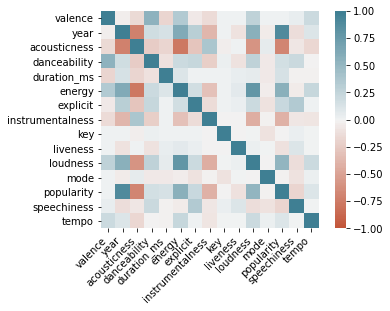

In [8]:
# heatmap ile korelasyon katsayısı yorumlama
corr = reduced_dataset.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [9]:
"""
year ve popularity , loudness ve energy, valence ve danceability arasında doğrudan ilişki ve
energy ve acousticness, acousticness ve year,acousticness ve loudness, acousticness ve popularity 
arasında ters ilişki olduğu için
energy,acousticness ve year özellikleri de veri kümesinden çıkartılmıştır.
"""
corr_dataset=reduced_dataset.drop(columns=["energy","year", "acousticness", "danceability"])
corr_columns = corr_dataset.columns
corr_dataset.head()

valence  duration_ms  explicit  instrumentalness  key  liveness  loudness  \
0   0.0594       831667         0          0.878000   10     0.665   -20.096   
1   0.9630       180533         0          0.000000    7     0.160   -12.441   
2   0.0394       500062         0          0.913000    3     0.101   -14.850   
3   0.1650       210000         0          0.000028    5     0.381    -9.316   
4   0.2530       166693         0          0.000002    3     0.229   -10.096   

   mode  popularity  speechiness    tempo  
0     1           4       0.0366   80.954  
1     1           5       0.4150   60.936  
2     1           5       0.0339  110.339  
3     1           3       0.0354  100.109  
4     1           2       0.0380  101.665

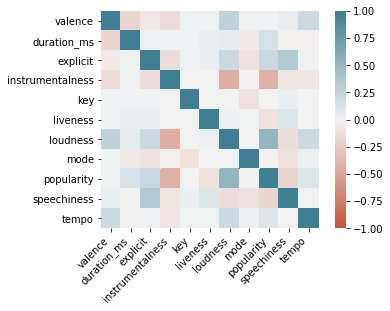

In [10]:
# korelasyon katsayısı ile özellik seçimi

corr = corr_dataset.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [11]:
corr_dataset.shape

(20000, 11)

In [12]:
# korelasyon veri kümesini normalize et
corr_normalizer = Normalizer()
corr_dataset = corr_normalizer.fit_transform(corr_dataset)
corr_dataset.shape

(20000, 11)

In [13]:
n_components = 2

pca = PCA(n_components=n_components)
pca.fit(reduced_dataset)
pca_dataset = pca.transform(reduced_dataset)
pca_dataset = pd.DataFrame(pca_dataset)
total_var = pca.explained_variance_ratio_.sum() * 100


labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}
fig = px.scatter_matrix(
    pca_dataset,
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',)
fig.update_traces(diagonal_visible=False)
fig.show()

In [14]:
# korelasyon veri kümesini normalize et
pca_normalizer = Normalizer()
pca_dataset = pca_normalizer.fit_transform(pca_dataset)
pca_dataset.shape

(20000, 2)

In [15]:
def findDifferentKinertias(dataset,max_k=10):
    
    inertias=[]
    ks= []
    labels_list=[]
    count_means_list = []
    for k in range(2,max_k):
        print("k:{}".format(k))
        labels, inertia, count_means = kMeansCluster(dataset,k)
        inertias.append(inertia)
        ks.append(k)
        labels_list.append(labels)
        count_means_list.append(count_means)
    return ks, inertias, labels_list, count_means_list

In [16]:
def distance(k1,p1,k2,p2):
    return np.sqrt(pow(k2-k1, 2) + pow(p2-p1, 2))

In [17]:
def optimalElbow(ks,inertias):
    initial_k = ks[0]
    final_k = ks[len(ks)-1]
    initial_inertia = inertias[0]
    final_inertia = inertias[len(inertias)-1]
    
    max_dist = 0
    optimal_k = 0
    for i,k in enumerate(ks):
        a = distance(k, inertias[i], final_k, final_inertia)
        b = distance(k, inertias[i], initial_k, initial_inertia)
        c = distance(initial_k, initial_inertia, final_k, final_inertia)
        h = np.sqrt(pow(b,2) - pow(((pow(c,2) + pow(b,2) - pow(a,2))/(2*c)),2))
        #print("a:{}, b:{}, c:{}, h:{}".format(a,b,c,h))
        if h > max_dist:
            max_dist = h
            optimal_k = k
    return optimal_k


In [18]:
# "The Elbow for Selection of Optimal 'K' Clusters"
def plotElbow(optimal_k,ks,inertias, title):
    plt.plot(ks, inertias,marker="o", color="red")
    ok = plt.plot(optimal_k, inertias[optimal_k-2], color='green',marker="o", markersize=10)
    plt.xlabel("K")
    plt.ylabel("WCSS")
    plt.title(title)

In [19]:
def kMeansCluster(dataset, n_cluster=2, max_iter=100):
    # convert pandas dataframe to numpy 
    if type(dataset) == pd.core.frame.DataFrame:
        dataset = dataset.values
    
    # dataset rows
    rows = dataset.shape[0]
    
    # dataset cols
    cols = dataset.shape[1]
    
    # select means randomly or first n_cluster of dataset
    #means = np.random.randint(low=0,high=(rows-1),size=(n_cluster, cols))
    means = np.zeros((n_cluster, cols))
    new_means = np.zeros((n_cluster, cols))
    
    # initialize means
    for i in range(n_cluster):
        means[i] = dataset[i]
        
    #print("means:{}".format(means))
    labels = np.zeros(rows)
    
    # while means change
    iter = 0
    while not (means == new_means).all() and iter < max_iter:
        inertia = 0
        iter+=1
        # labels means that clusters of samples 
        labels = np.zeros(rows)
        
        sum_means = np.zeros((n_cluster, cols))
        count_means = np.zeros(n_cluster)
        
        # distance between sample and its mean of cluster
        dist_means = np.zeros(n_cluster)
        
        # find labels
        for r in range(rows):
            min_dist = np.finfo('d').max
            for m,mean in enumerate(means):
                dist = np.sqrt(np.power(dataset[r]-mean,2).sum())
                
                # find closed cluster mean
                if( dist < min_dist):
                    min_dist = dist
                    labels[r] = m
            
            # sum of each cluster's samples   
            sum_means[int(labels[r])] += dataset[r]        
            
            # count of each cluster's samples
            count_means[int(labels[r])]+= 1
            
            # subset of WCSS
            dist_means[int(labels[r])] =dist_means[int(labels[r])] + np.power(dataset[r]-means[int(labels[r])],2).sum()
            
        # WCSS
        inertia = dist_means.sum()

        # update means
        means = np.copy(new_means)
        
        # calculate new_means
        for i in range(n_cluster):
            if count_means[i] !=0:
                new_means[i] = sum_means[i]/count_means[i]
        #print("new_means:{}".format(new_means))  
    return labels, inertia, count_means

k:2
k:3
k:4
k:5
k:6
k:7
k:8
k:9
k:10
k:11
k:12
k:13
count_means_list:[1900. 8006. 3617. 6375.  102.]
CPU times: user 28min 47s, sys: 53.8 ms, total: 28min 47s
Wall time: 28min 47s


valence  duration_ms  explicit  instrumentalness       key  \
0  7.142282e-08          1.0       0.0      1.055711e-06  0.000012   
1  5.334205e-06          1.0       0.0      0.000000e+00  0.000039   
2  7.879023e-08          1.0       0.0      1.825774e-06  0.000006   
3  7.857142e-07          1.0       0.0      1.319047e-10  0.000024   
4  1.517760e-06          1.0       0.0      1.007841e-11  0.000018   

       liveness  loudness      mode  popularity   speechiness     tempo  label  
0  7.995989e-07 -0.000024  0.000001    0.000005  4.400800e-08  0.000097    1.0  
1  8.862645e-07 -0.000069  0.000006    0.000028  2.298749e-06  0.000338    1.0  
2  2.019750e-07 -0.000030  0.000002    0.000010  6.779159e-08  0.000221    1.0  
3  1.814286e-06 -0.000044  0.000005    0.000014  1.685714e-07  0.000477    1.0  
4  1.373783e-06 -0.000061  0.000006    0.000012  2.279639e-07  0.000610    2.0

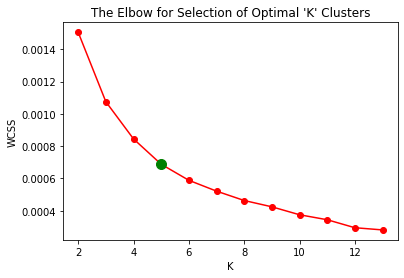

In [20]:
%%time
# corr_dataset result
ks, inertias, labels_list,count_means_list = findDifferentKinertias(corr_dataset,14)
optimal_k = optimalElbow(ks, inertias)
title = "The Elbow for Selection of Optimal 'K' Clusters"
plotElbow(optimal_k,ks,inertias, title)

print("count_means_list:{}".format(count_means_list[optimal_k-2]))

corr_dataset = pd.DataFrame(corr_dataset,columns = corr_columns)
corr_dataset["label"]=labels_list[optimal_k-2]
corr_dataset.head()

k:2
k:3
k:4
k:5
k:6
k:7
k:8
k:9
k:10
k:11
k:12
k:13
count_means_list:[6.0000e+00 1.2292e+04 7.6770e+03 7.0000e+00 1.4000e+01 4.0000e+00]
CPU times: user 26min 8s, sys: 44 ms, total: 26min 8s
Wall time: 26min 9s


0         1  label
0  1.000000  0.000168    2.0
1 -0.999998  0.001751    1.0
2  1.000000  0.000274    2.0
3 -0.999986  0.005357    1.0
4 -0.999999  0.001132    1.0

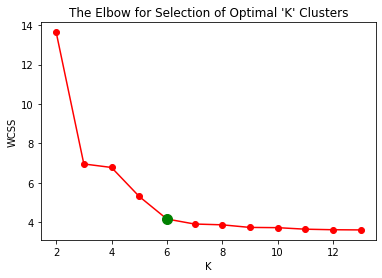

In [21]:
%%time
# pca_dataset result
ks, inertias, labels_list, count_means_list = findDifferentKinertias(pca_dataset,14)
optimal_k = optimalElbow(ks, inertias)
title = "The Elbow for Selection of Optimal 'K' Clusters"
plotElbow(optimal_k,ks,inertias, title)

print("count_means_list:{}".format(count_means_list[optimal_k-2]))

pca_dataset = pd.DataFrame(pca_dataset)
pca_dataset["label"]=labels_list[optimal_k-2]
pca_dataset.head()

In [24]:
def plotDataset(dataset):
    x = dataset.iloc[:, 0:dataset.values.shape[1]-1].values

    # Separating out the target
    y = dataset.loc[:,['label']].values

    pca = PCA(n_components=2)

    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents
                 , columns = ['principal component 1', 'principal component 2'])

    finalDf = pd.concat([principalDf, dataset[['label']]], axis = 1)

    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('1. boyut', fontsize = 15)
    ax.set_ylabel('2. boyut', fontsize = 15)
    ax.set_title('Spotify Veri Kümesi', fontsize = 20)
    targets = np.unique(finalDf['label'].values)

    cmaps = ['r','g','b','c','m','y','lime','orange','tomato']

    colors = []
    for i in range(len(targets)):
        colors.append(cmaps[i])
    print("colors:{}".format(colors))

    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['label'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                   , finalDf.loc[indicesToKeep, 'principal component 2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()

colors:['r', 'g', 'b', 'c', 'm', 'y']


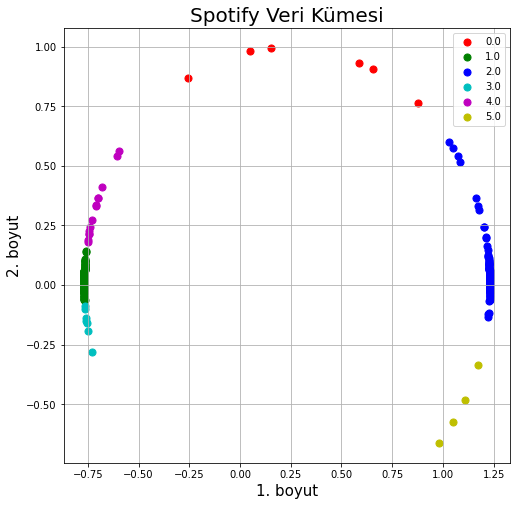

In [25]:
plotDataset(pca_dataset)

colors:['r', 'g', 'b', 'c', 'm']


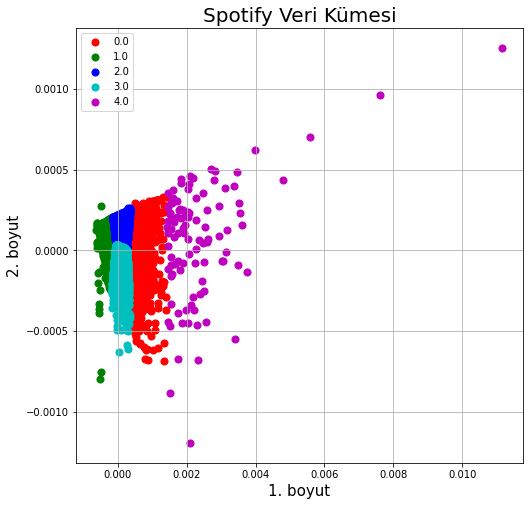

In [26]:
plotDataset(corr_dataset)